In [452]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc , confusion_matrix, precision_recall_curve

In [453]:

train=pd.read_csv("ASR_data.csv")
train

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
4,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,76512,1,1,1,9238,1,1,134.0,1,19,...,0,6,6,6,12.166667,0,7.6,2.6,0.32,Graduate
61574,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
61575,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
61576,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [454]:
encode=OrdinalEncoder()
train['Target']=encode.fit_transform(train[['Target']])

In [455]:
train.info

<bound method DataFrame.info of           id  Marital status  Application mode  Application order  Course  \
0          0               1                 1                  1    9238   
1          1               1                17                  1    9238   
2          2               1                17                  2    9254   
3          4               1                 1                  2    9500   
4          5               1                39                  1     171   
...      ...             ...               ...                ...     ...   
61573  76512               1                 1                  1    9238   
61574  76513               1                17                  1    9254   
61575  76514               1                 1                  6    9254   
61576  76516               1                 1                  3    9070   
61577  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous

<Axes: >

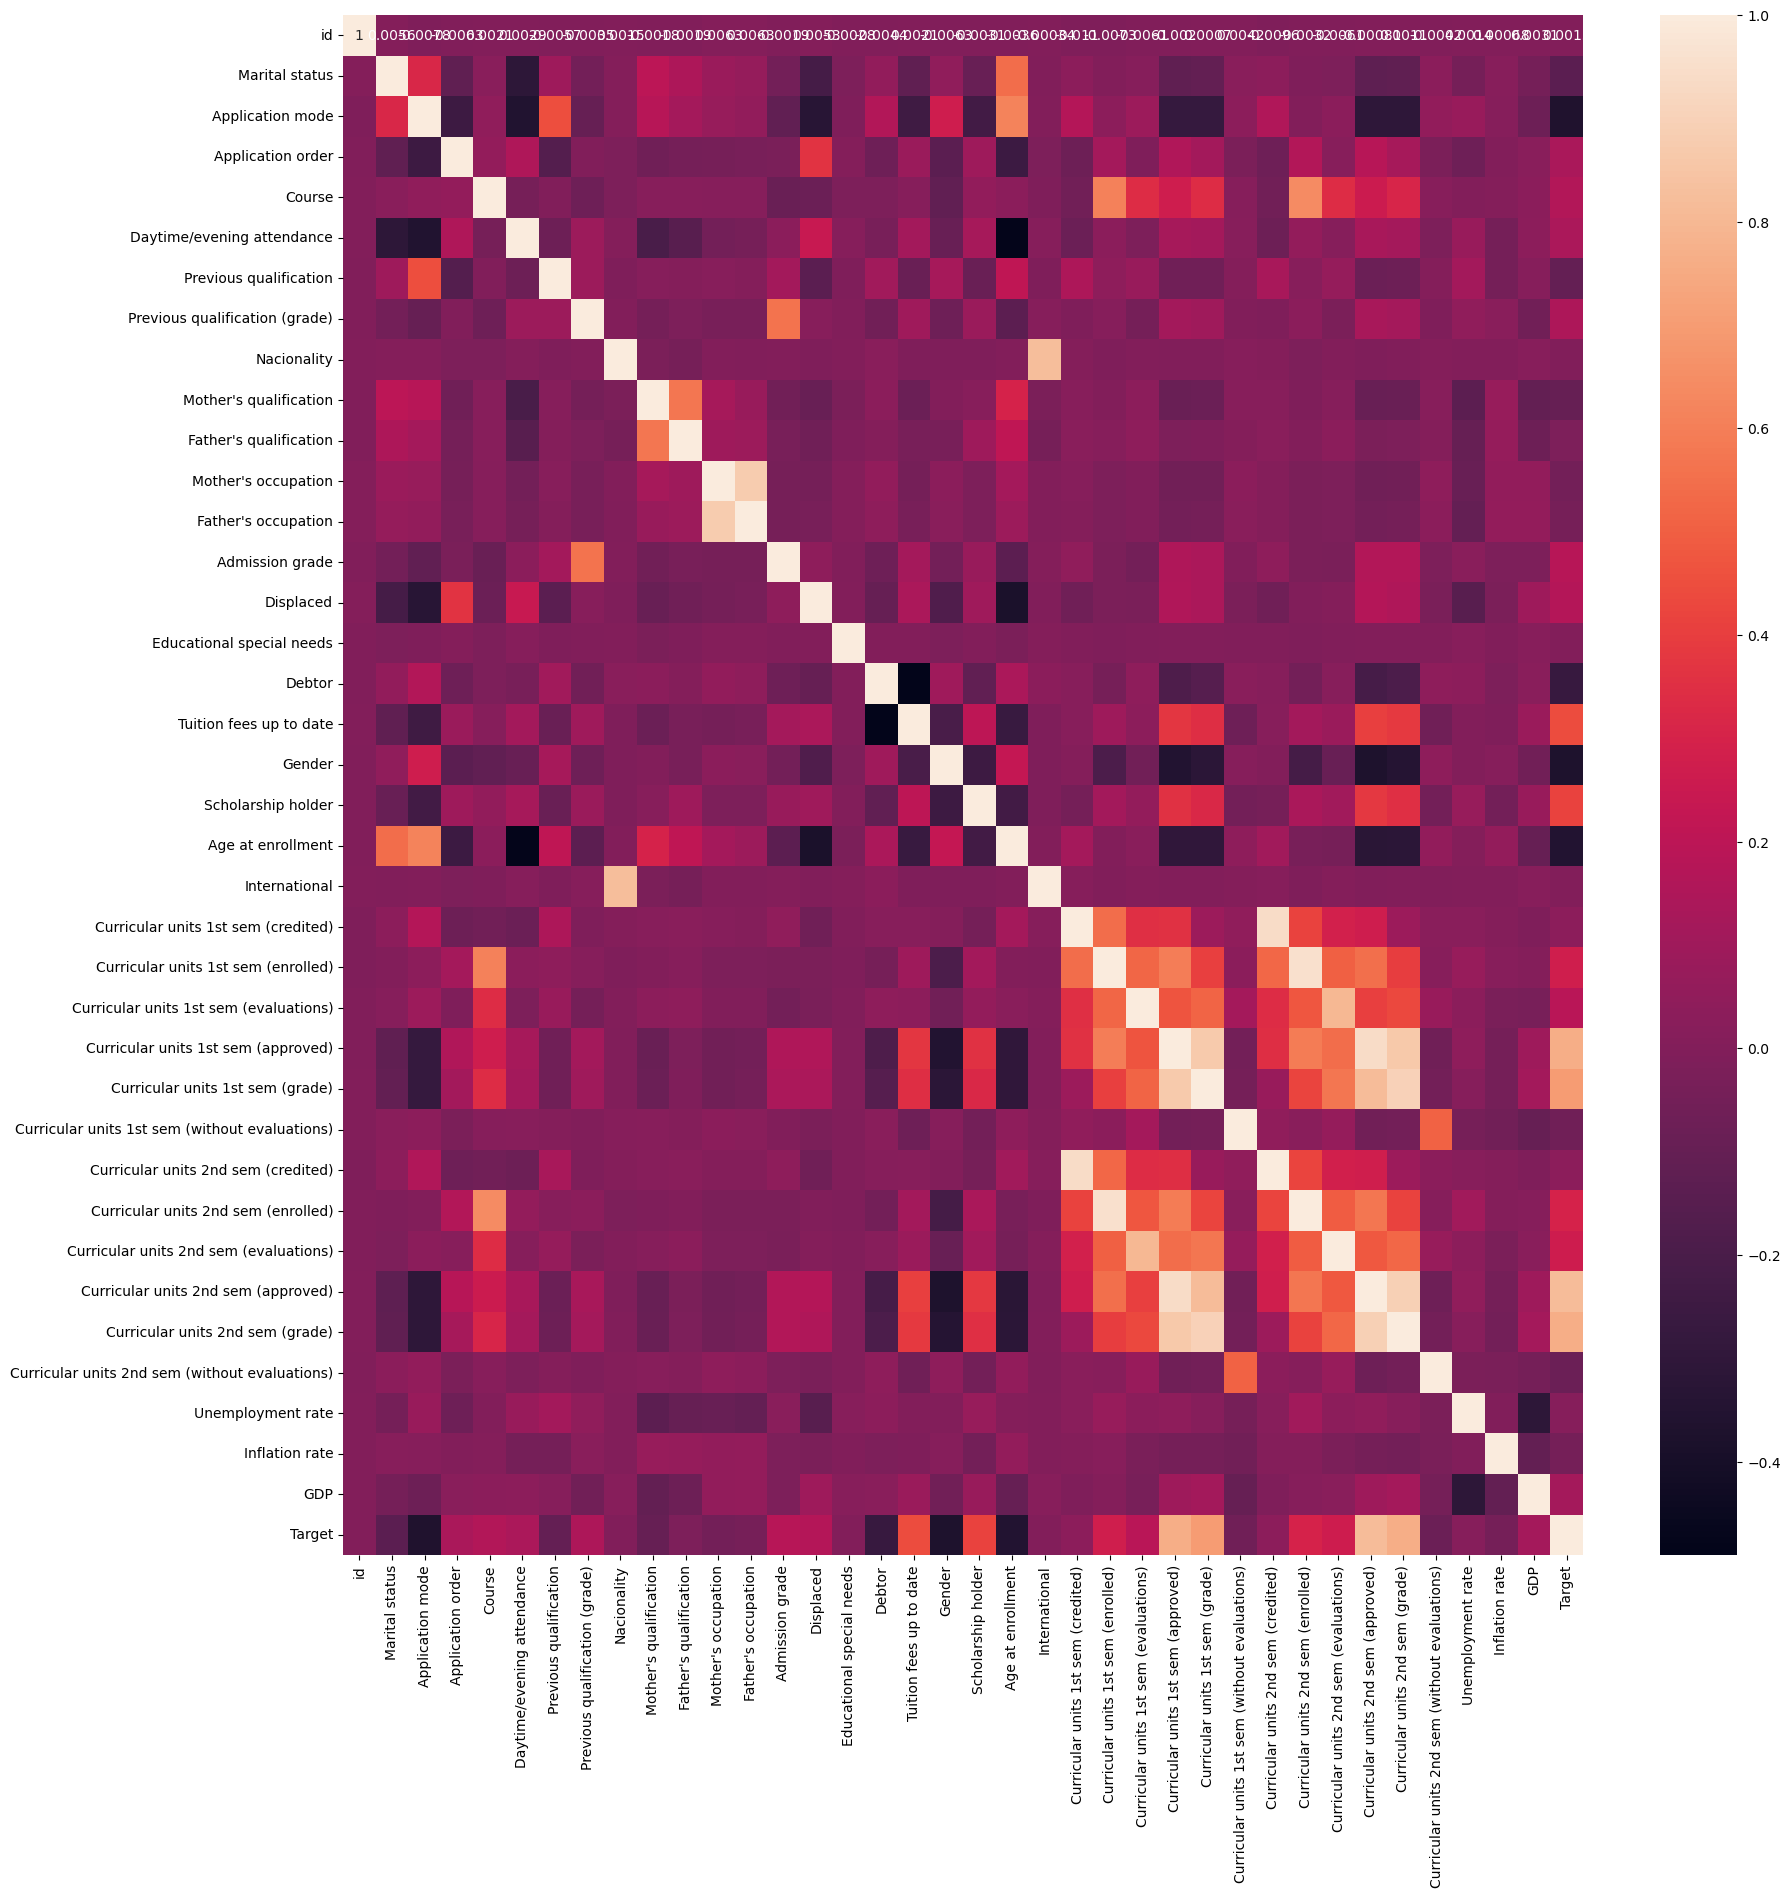

In [456]:
plt.figure(figsize=(20,20))
sb.heatmap(train.corr(),annot=True)

<Axes: xlabel='Target'>

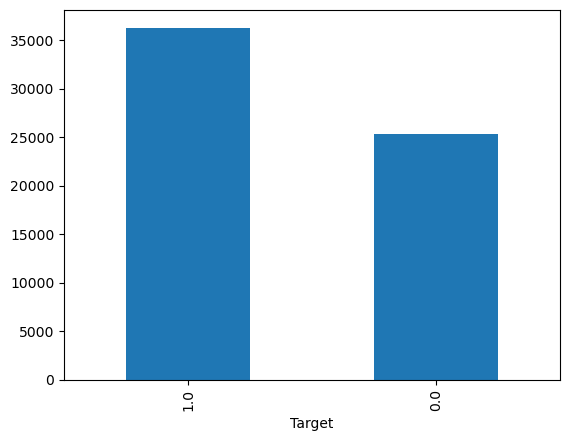

In [457]:
train['Target'].value_counts().plot.bar()

In [465]:

features=['Course','Daytime/evening attendance','Previous qualification','Previous qualification (grade)',  'Admission grade','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (grade)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',  'Debtor','Tuition fees up to date', 'Gender', 'Scholarship holder','Age at enrollment', 'International', 'Curricular units 2nd sem (grade)']

X=train[features]
y=train.Target

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)


0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
61573    1.0
61574    1.0
61575    1.0
61576    0.0
61577    1.0
Name: Target, Length: 61578, dtype: float64

In [459]:
model=xgb.XGBClassifier(n_estimators=300,learning_rate=0.05)

In [460]:
model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [461]:
predict=model.predict(test_X)
print(predict)
output=pd.DataFrame({'Target':predict})

[0 1 1 ... 1 0 1]


In [462]:
cm = confusion_matrix(test_y,predict)
cm

array([[4494,  577],
       [ 262, 6983]], dtype=int64)

In [463]:

error=acc(predict,test_y)
print(error)

0.9318772328678142


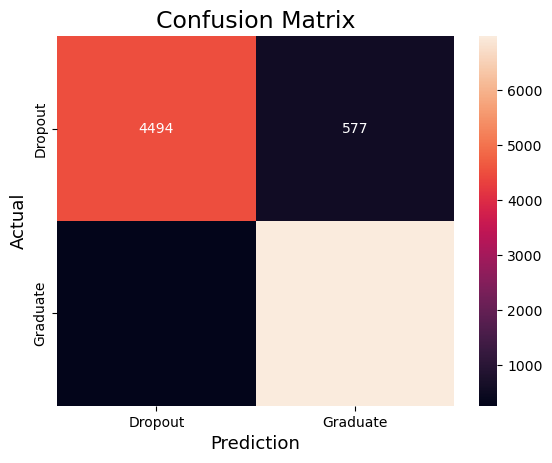

In [471]:
sb.heatmap(cm,annot=True,fmt='g',            
           xticklabels=['Dropout','Graduate'],
            yticklabels=['Dropout','Graduate'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()